# Dataset: 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

%matplotlib inline

In [2]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [5]:
del df["Id"]
df = df[~df.SalesPrice.isnull()]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [7]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True).values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.007408, test: 897715180337556750336.000000
R2: train: 0.949453, test: -4750079859651933896704.000000


In [9]:
target = "SalesPrice"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True).values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=0.1,
                                      random_state=1,
                                      l1_ratio=1,
                                      max_iter=1000))
])



pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.010006, test: 0.024337
R2: train: 0.931719, test: 0.871224


In [17]:
scores = model_selection.cross_val_score(pipe, X, y
                            ,cv = 5, scoring="neg_mean_squared_error")

In [18]:
- scores, - np.mean(scores)

(array([0.01645286, 0.02446447, 0.02244619, 0.01567544, 0.03392212]),
 0.022592214768555725)

In [48]:
np.random.ranf(10) * 0.1 - 0.08

array([-0.00734588, -0.0776037 , -0.00351548, -0.0578253 , -0.04246036,
       -0.07457748, -0.07503271, -0.07972384, -0.07982775,  0.00204051])

In [ ]:
%%time 

param_grid = {
    "est__alpha": np.random.ranf(10) * 0.001 - 0.08,
    #"est__l1_ratio": np.linspace(0.001, .999, 10)
}

gs = model_selection.GridSearchCV(pipe
                                  , param_grid
                                  , scoring="neg_mean_squared_error"
                                  , cv = 5
                                  , n_jobs = 6)
gs.fit(X_train, y_train)

y_test_pred = gs.predict(X_test)
print("test mse:", metrics.mean_squared_error(y_test, y_test_pred), 
      "best params", gs.best_params_)

In [20]:
10 ** np.linspace(-2, 3, 10)

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

In [21]:
np.linspace(0.001, .999, 10)

array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ])

In [46]:
gs.best_params_

{'est__alpha': 0.08143526635006904}

In [27]:
gs.best_score_

-0.025357432012332176

In [28]:
est = gs.best_estimator_

In [ ]:
gs.predict

In [29]:
y_test_pred = est.predict(X_test)

In [30]:
metrics.mean_squared_error(y_test, y_test_pred)

0.026692186569052805

In [39]:
y_test_pred = gs.predict(X_test)
metrics.mean_squared_error(y_test, y_test_pred)

0.027808286675254593

In [31]:
import pickle

In [34]:
with open("/tmp/kaggle_house.pickle","wb") as f:
    pickle.dump(gs, f)

In [35]:
with open("/tmp/kaggle_house.pickle","rb") as f:
    model = pickle.load(f)

In [36]:
y_test_pred = model.predict(X_test)
metrics.mean_squared_error(y_test, y_test_pred)

0.026692186569052805

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 4., 1., 1., 0., 2.,
        3., 8., 4., 3., 3., 4., 3., 4., 2., 6., 2., 4., 3., 6., 4., 5., 2.,
        1., 3., 2., 1., 1., 3., 1., 2., 4., 1., 1., 1., 0., 0., 0., 1.]),
 array([-2.23300624, -2.12747128, -2.02193633, -1.91640137, -1.81086641,
        -1.70533146, -1.5997965 , -1.49426154, -1.38872658, -1.28319163,
        -1.17765667, -1.07212171, -0.96658676, -0.8610518 , -0.75551684,
        -0.64998189, -0.54444693, -0.43891197, -0.33337702, -0.22784206,
        -0.1223071 , -0.01677214,  0.08876281,  0.19429777,  0.29983273,
         0.40536768,  0.51090264,  0.6164376 ,  0.72197255,  0.82750751,
         0.93304247,  1.03857742,  1.14411238,  1.24964734,  1.3551823 ,
         1.46071725,  1.56625221,  1.67178717,  1.77732212,  1.88285708,
         1.98839204,  2.09392699,  2.19946195,  2.30499691,  2.41053186,
         2.51606682,  2.62160178,  2.72713674,  2.83267169,  2.93820665,
         3.04374161]),
 <a list of 50 Patch 

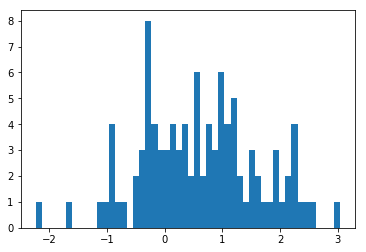

In [44]:
plt.hist(np.random.randn(100) + .66, bins = 50)